In [1]:
# %% Library & Initialize Dataset and Backtesting Platform
from library.functions import *

dataset = {}
#dataset['0005.HK'] = 'EQ'  # Close, Volume
#dataset['0700.HK'] = 'EQ'  # Close, Volume
#dataset['HSI'] = 'EQ'  # Close, Volume
#dataset['PUT'] = 'Custom'  # requires functions
#dataset['CALL'] = 'Custom'  # requires functions
dataset['VHSI'] = 'Vol'  # Close
#dataset['VIX'] = 'Vol'  # Close
dataset['USDHKD'] = 'FX'  # Bid, Ask
#dataset['XAUHKD'] = 'FX'  # Bid, Ask
#dataset['HKDTRY'] = 'FX'  # Bid, Ask
#dataset['USDTRY'] = 'FX'  # Bid, Ask
#dataset['XRPUSD'] = 'FX'  # Bid, Ask
# load dataset and setup initial cash + default handling fee
platform = backtest(10000000, 100, dataset)

Dataset VHSI is loaded
Dataset USDHKD is loaded
Dataset Range: from 2018-08-07 09:31:00 to 2018-12-07 16:01:00


In [6]:
# %% Backtest Params
start = platform.validstart  # initialize start date
end = platform.validend  # initialize start date
start = datetime.datetime(2018, 9, 1, 0, 0, 0)  # initialize start date
end = datetime.datetime(2018, 12, 1, 0, 0, 0)  # initialize start date
mask = (platform.quote['USDHKD'].index > start) & (platform.quote['USDHKD'].index <= end)
backtestperiod = platform.quote['USDHKD'].loc[mask]
platform.initportfolio(10000000, 100)  # reset initial cash + default handling fee

In [7]:
# %% Backtesting
prev = None  # for accessing last minute quotation
# start looping every 1 minute
print('Start Backtesting...')
for time, reference in backtestperiod.iterrows():
    # Examples:
    if not prev:  # skip first loop to record the time
        # HSI derivatives
        prev = time
        continue

    # Check if EQ market is opened
    if platform.is_eqmktopen(time):

        # Trade conditions
        if (    # One trade per day at 16:10
                time.time() == datetime.time(16, 10, 0)  
        ):
            # Close Existing Position
            platform.trade(time, 'VHSI', 'CLOSE')  
            # High Volatility
            if platform.quote['VHSI'].loc[time].Close > 16:
                platform.trade(time, 'VHSI', 'SHORT', 5000)
            # Low Volatility
            elif platform.quote['VHSI'].loc[time].Close < 16:    
                platform.trade(time, 'VHSI', 'LONG', 5000)
                
    # EQ is not in trading hours
    else:
        pass                                             

    prev = time  # Save this time for next loop

    # Update position info once a day: Unrealized, realized P&L
    if time.timestamp() % 86400 == 0:
        platform.updatepos(time)

Start Backtesting...
2018-09-03 16:10:00 Avl.Cash: 9901750.0 VHSI SHORT 5000 @ 19.63
2018-09-04 16:10:00 Avl.Cash: 10004100.0 VHSI CLOSE 5000 @ 18.73
2018-09-04 16:10:00 Avl.Cash: 9910350.0 VHSI SHORT 5000 @ 18.73
2018-09-05 16:10:00 Avl.Cash: 9994850.0 VHSI CLOSE 5000 @ 20.5
2018-09-05 16:10:00 Avl.Cash: 9892250.0 VHSI SHORT 5000 @ 20.5
2018-09-06 16:10:00 Avl.Cash: 9989850.0 VHSI CLOSE 5000 @ 21.42
2018-09-06 16:10:00 Avl.Cash: 9882650.0 VHSI SHORT 5000 @ 21.42
2018-09-07 16:10:00 Avl.Cash: 9989850.0 VHSI CLOSE 5000 @ 21.34
2018-09-07 16:10:00 Avl.Cash: 9883050.0 VHSI SHORT 5000 @ 21.34
2018-09-10 16:10:00 Avl.Cash: 9985800.0 VHSI CLOSE 5000 @ 22.07
2018-09-10 16:10:00 Avl.Cash: 9875350.0 VHSI SHORT 5000 @ 22.07
2018-09-11 16:10:00 Avl.Cash: 9986800.0 VHSI CLOSE 5000 @ 21.79
2018-09-11 16:10:00 Avl.Cash: 9877750.0 VHSI SHORT 5000 @ 21.79
2018-09-12 16:10:00 Avl.Cash: 9989900.0 VHSI CLOSE 5000 @ 21.09
2018-09-12 16:10:00 Avl.Cash: 9884350.0 VHSI SHORT 5000 @ 21.09
2018-09-13 16:10:00 

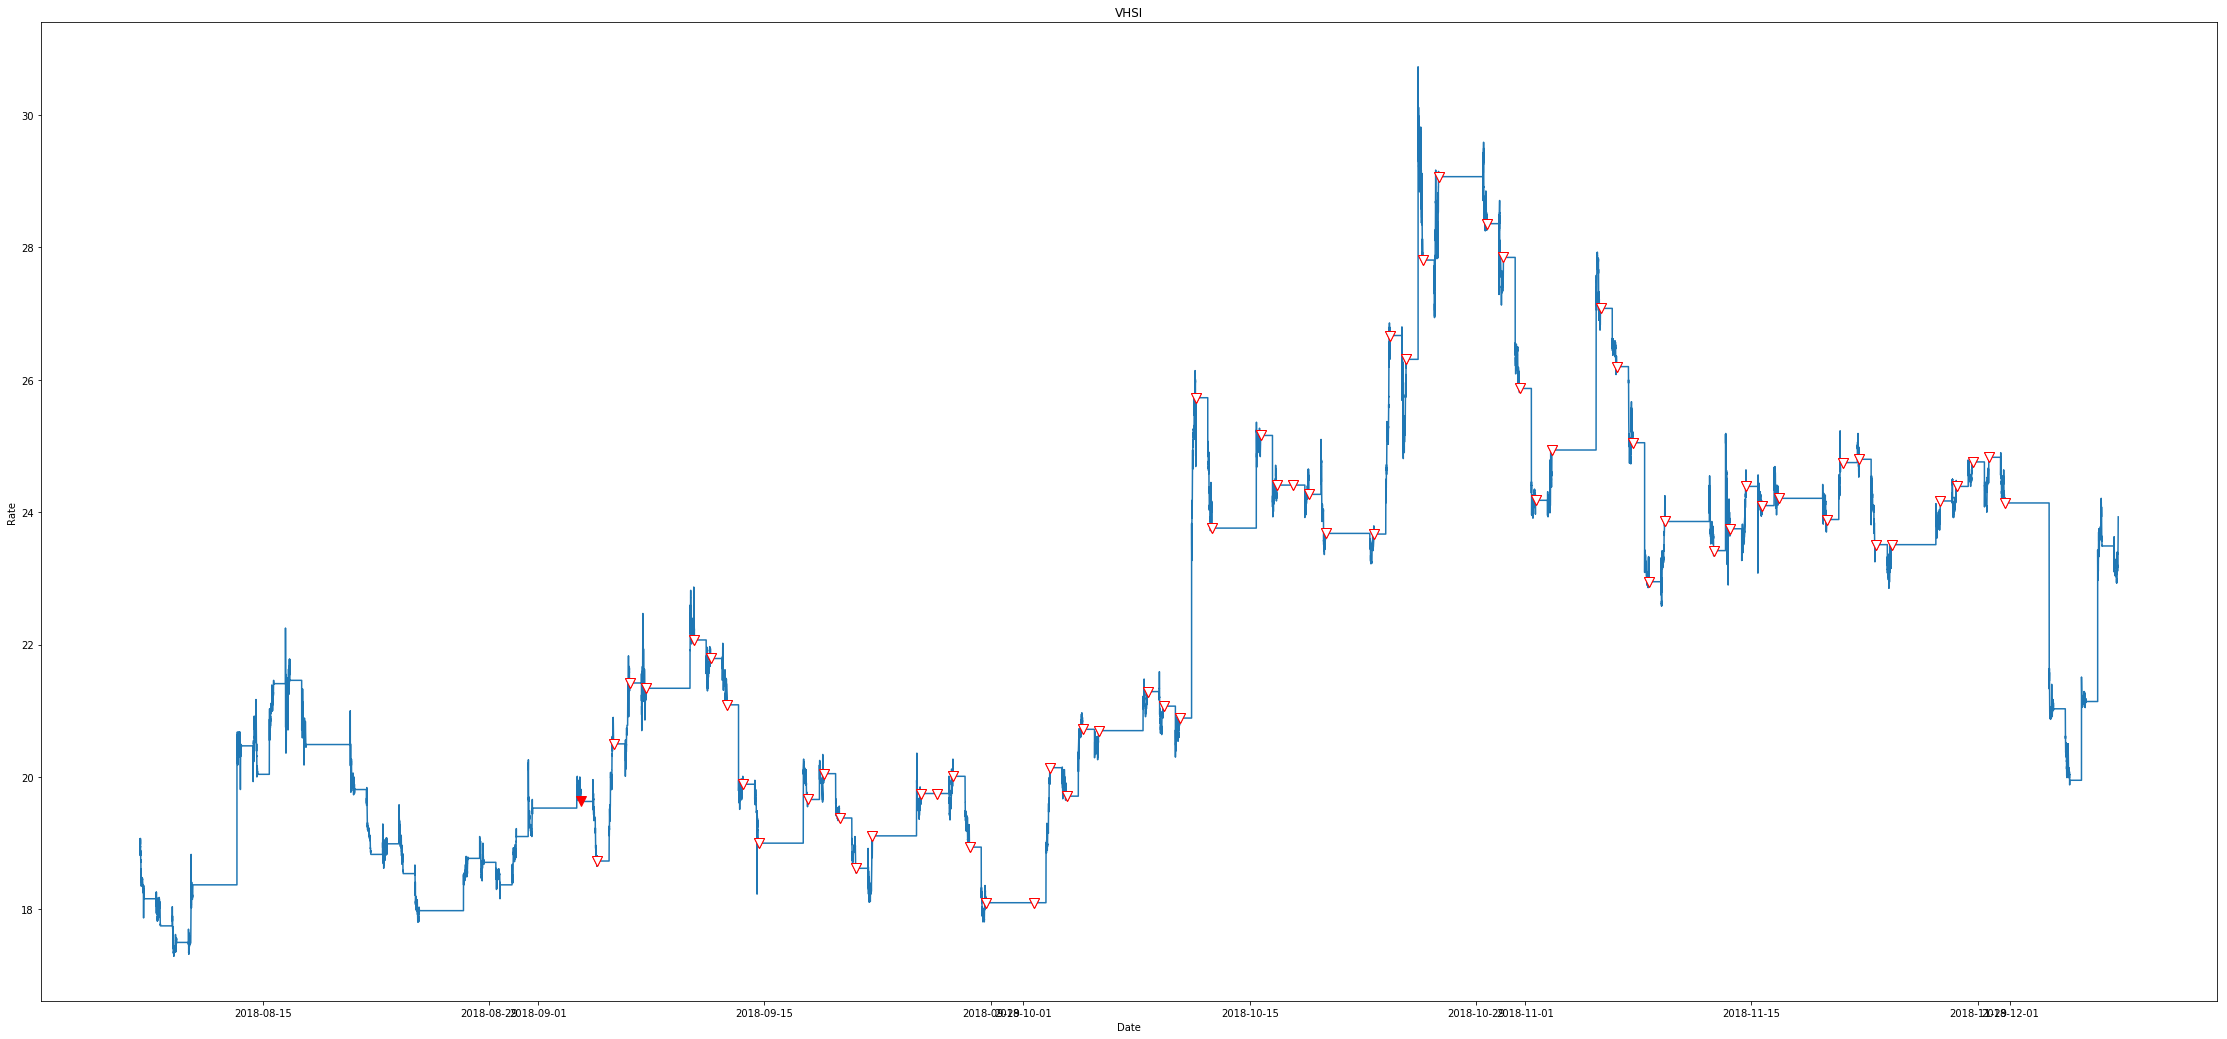

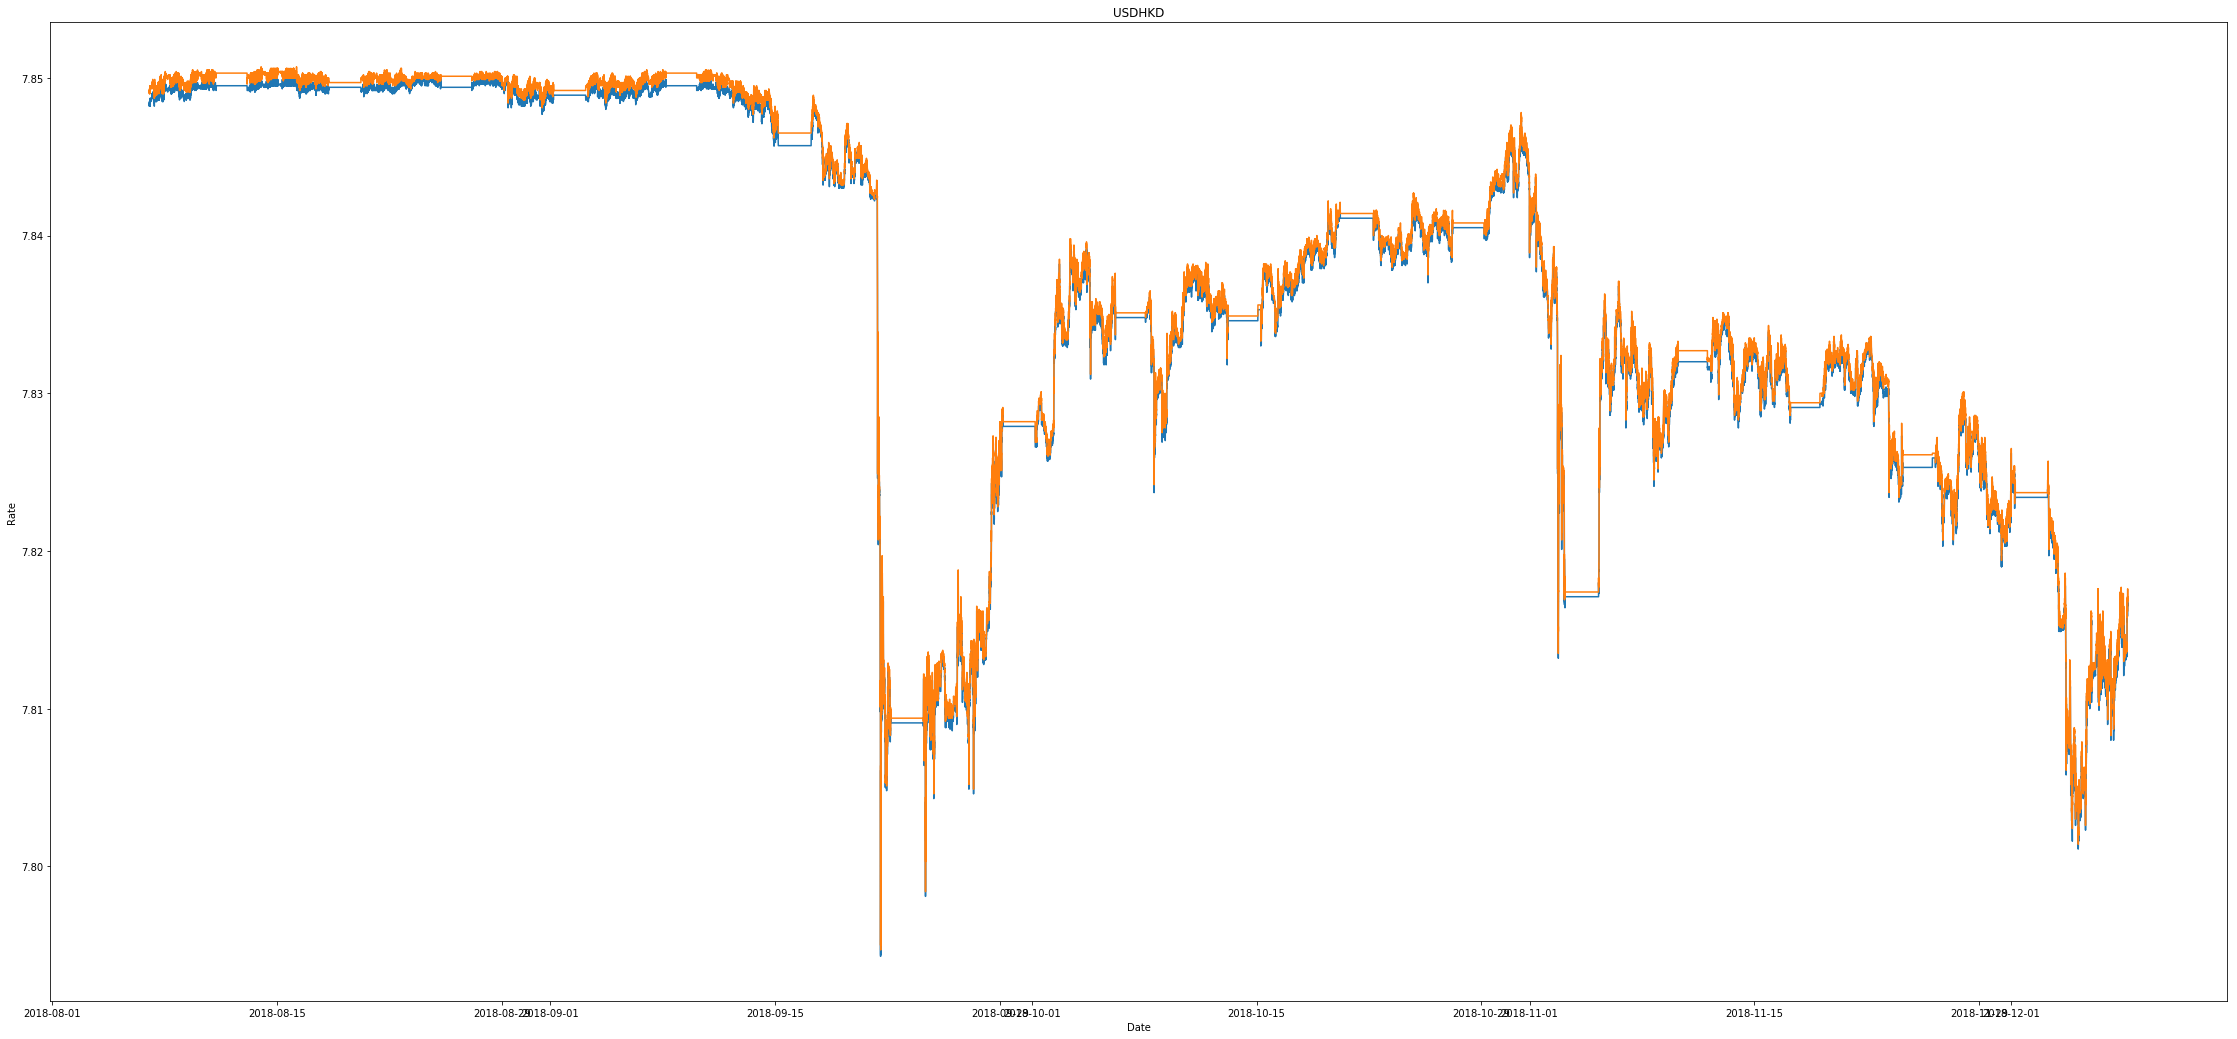

Activities:
   Product Position  Open Rate Close Rate      P&L
0     VHSI    SHORT       19.6       18.7   4300.0
1     VHSI    SHORT       18.7       20.5  -9050.0
2     VHSI    SHORT       20.5       21.4  -4800.0
3     VHSI    SHORT       21.4       21.3    200.0
4     VHSI    SHORT       21.3       22.1  -3850.0
5     VHSI    SHORT       22.1       21.8   1200.0
6     VHSI    SHORT       21.8       21.1   3300.0
7     VHSI    SHORT       21.1       19.9   5800.0
8     VHSI    SHORT       19.9       19.0   4250.0
9     VHSI    SHORT       19.0       19.7  -3500.0
10    VHSI    SHORT       19.7       20.1  -2150.0
11    VHSI    SHORT       20.1       19.4   3150.0
12    VHSI    SHORT       19.4       18.6   3600.0
13    VHSI    SHORT       18.6       19.1  -2650.0
14    VHSI    SHORT       19.1       19.8  -3400.0
15    VHSI    SHORT       19.8       19.8   -200.0
16    VHSI    SHORT       19.8       20.0  -1500.0
17    VHSI    SHORT       20.0       18.9   5150.0
18    VHSI    SHORT

In [8]:
from pylab import *
rcParams['figure.figsize'] = (39, 18)
# %% Export Portfolio
tradelog = None
portfolio, tradelog = platform.exporttrades()
for i in range(len(tradelog)):
    tradelog.loc[i, 'P&L'] = tradelog.loc[i, 'Unrealized P&L'] + tradelog.loc[i, 'Realized P&L']
print('Activities:')
print(tradelog[['Product', 'Position', 'Open Rate', 'Close Rate', 'P&L']])
print('Summary:')
print('Initial Cash:', round(portfolio['initial']), 'Final Cash:', round(portfolio['cash']))
print('Unrealized P&L:', round(portfolio['Unrealized P&L']), 'Realized P&L:', round(portfolio['Realized P&L']))
print('Overall P&L:', round(portfolio['P&L']), 'P&L%:', round(portfolio['P&L%']))

In [9]:
# %% insert
tradelog.to_excel('vhsi.xlsx')